# Exploration Script

In [1]:
import sys
sys.path.append("../src")

# Loading in pre-built packages
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose

# Self Built Functions that have been unit tested
from mmm.make_synthetic_panel import make_synthetic_panel
from mmm.transformations_datagen import adstock, hill_saturation

# Generating Synthetic Panel Data
panel_data = make_synthetic_panel(n_products=5, n_weeks=156)
panel_data.head()

product_id  week     spend_tv  spend_search  spend_social       price  \
0           0     0  3055.799898   3036.459214   1756.195344  104.701447   
1           0     1  6556.609921   4725.395939   1024.682082  104.329843   
2           0     2  7549.901027   4302.431623    651.390474  101.058049   
3           0     3  3045.632463   3042.501074   3128.586193  104.431970   
4           0     4  2886.613051   4240.475478   1029.051390  102.453834   

    gdp_index     kpi_sales  
0   98.687890  27558.530707  
1  102.552586  33283.856519  
2  103.358371  24794.870445  
3  101.289113  31548.939459  
4  102.347327  28823.090453

Missing values per column:
product_id      0
week            0
spend_tv        0
spend_search    0
spend_social    0
price           0
gdp_index       0
kpi_sales       0
dtype: int64

% missing values per column:
product_id      0.0
week            0.0
spend_tv        0.0
spend_search    0.0
spend_social    0.0
price           0.0
gdp_index       0.0
kpi_sales       0.0
dtype: float64

Column dtypes:
product_id        int64
week              int64
spend_tv        float64
spend_search    float64
spend_social    float64
price           float64
gdp_index       float64
kpi_sales       float64
dtype: object
spend_tv: min=901.23, max=27823.92, mean=7077.40
spend_search: min=333.88, max=11642.40, mean=3840.41
spend_social: min=116.09, max=6210.37, mean=1708.68
price: min=81.76, max=134.66, mean=109.90
gdp_index: min=96.88, max=118.37, mean=107.79
kpi_sales: min=0.00, max=89808.97, mean=42378.85


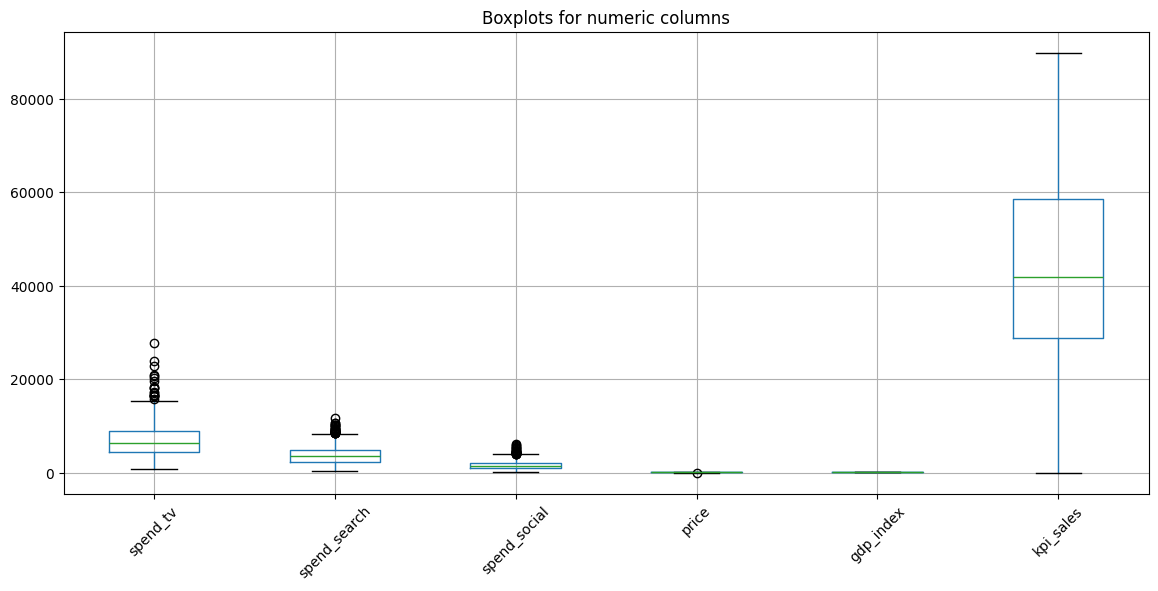

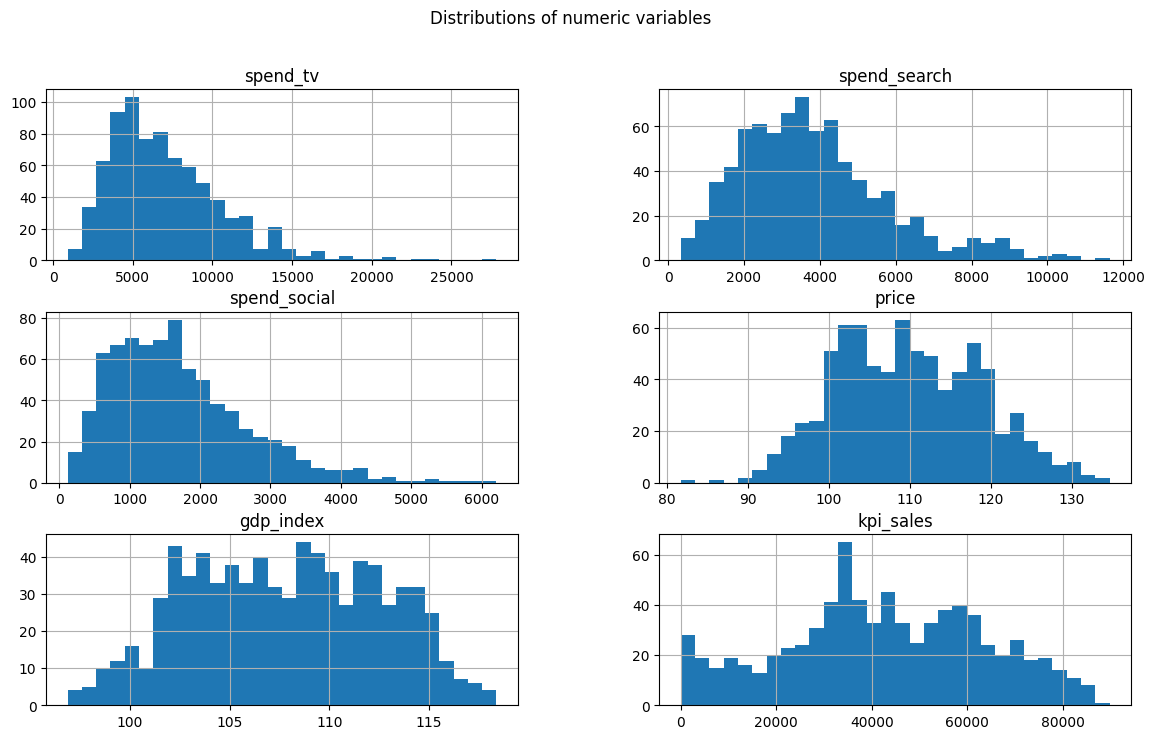


Number of potential outliers (>3 std deviations):
spend_tv        10
spend_search     8
spend_social     9
price            1
gdp_index        0
kpi_sales        0
dtype: int64

Number of duplicate rows: 0


In [3]:
# -------------------------------
# 1. Missing values
# -------------------------------
print("Missing values per column:")
print(panel_data.isnull().sum())
print("\n% missing values per column:")
print(panel_data.isnull().mean() * 100)

# -------------------------------
# 2. Data types & ranges
# -------------------------------
print("\nColumn dtypes:")
print(panel_data.dtypes)

numeric_cols = ["spend_tv", "spend_search", "spend_social", "price", "gdp_index", "kpi_sales"]

for col in numeric_cols:
    print(f"{col}: min={panel_data[col].min():.2f}, max={panel_data[col].max():.2f}, mean={panel_data[col].mean():.2f}")

negatives = (panel_data[numeric_cols] < 0)

if negatives.any().any():
    print("Negative values found in:")
    print(panel_data.loc[negatives.any(axis=1), numeric_cols])


# Check plausible ranges (example rules â€“ adjust for real Haleon data)
assert (panel_data["price"] > 0).all(), "Price contains non-positive values!"

# -------------------------------
# 3. Outlier detection
# -------------------------------
# Quick boxplots
plt.figure(figsize=(14,6))
panel_data[numeric_cols].boxplot()
plt.title("Boxplots for numeric columns")
plt.xticks(rotation=45)
plt.show()

# Histograms
panel_data[numeric_cols].hist(bins=30, figsize=(14,8))
plt.suptitle("Distributions of numeric variables")
plt.show()

# Z-score method to flag extreme outliers
z_scores = panel_data[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\nNumber of potential outliers (>3 std deviations):")
print(outliers)

# -------------------------------
# 4. Duplicate rows
# -------------------------------
duplicates = panel_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


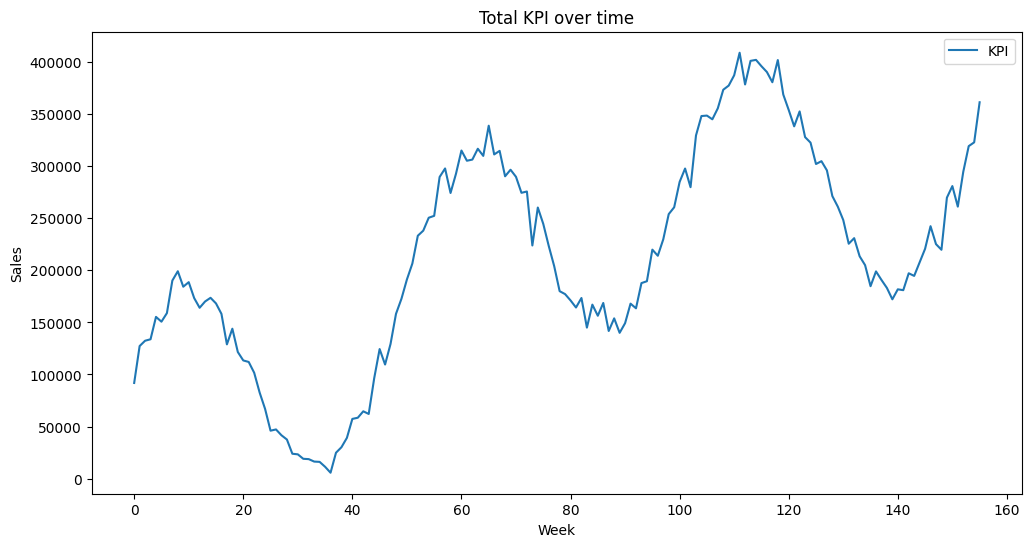

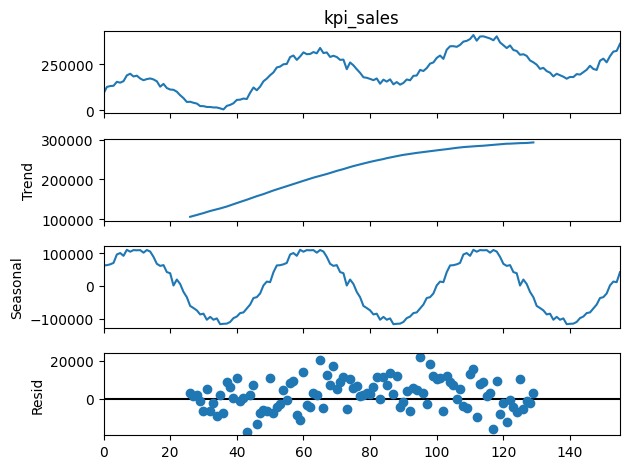

In [4]:
# Plotting KPI over time
kpi_total = panel_data.groupby("week")['kpi_sales'].sum()

# Plot KPI
plt.figure(figsize=(12,6))
plt.plot(kpi_total.index, kpi_total.values, label="KPI")
plt.title("Total KPI over time")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.legend()
plt.show() 

# Seasonally decomposing KPI 
decomp = seasonal_decompose(kpi_total, model = 'additive', period = 52)

decomp.plot()
plt.show()